# Improving road marking detections on images

This notebook uses the function and methods we created in order to detect road markings on roads' input images. We'll try these algorithms on images and videos.

In [9]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from markings_utils import *
from averaging_tools import *

In [10]:
# load the image
road_img = cv2.imread('test_image.jpg')

# show the image
"""cv2.imshow('Image of a road', road_img)
cv2.waitKey()
cv2.destroyAllWindows()"""

"cv2.imshow('Image of a road', road_img)\ncv2.waitKey()\ncv2.destroyAllWindows()"

### Canny edge detection

In [11]:
# apply canny edge detection
img_copy = np.copy(road_img) # copy of the original image
canny_img = canny_edge(img_copy, 50 , 100)

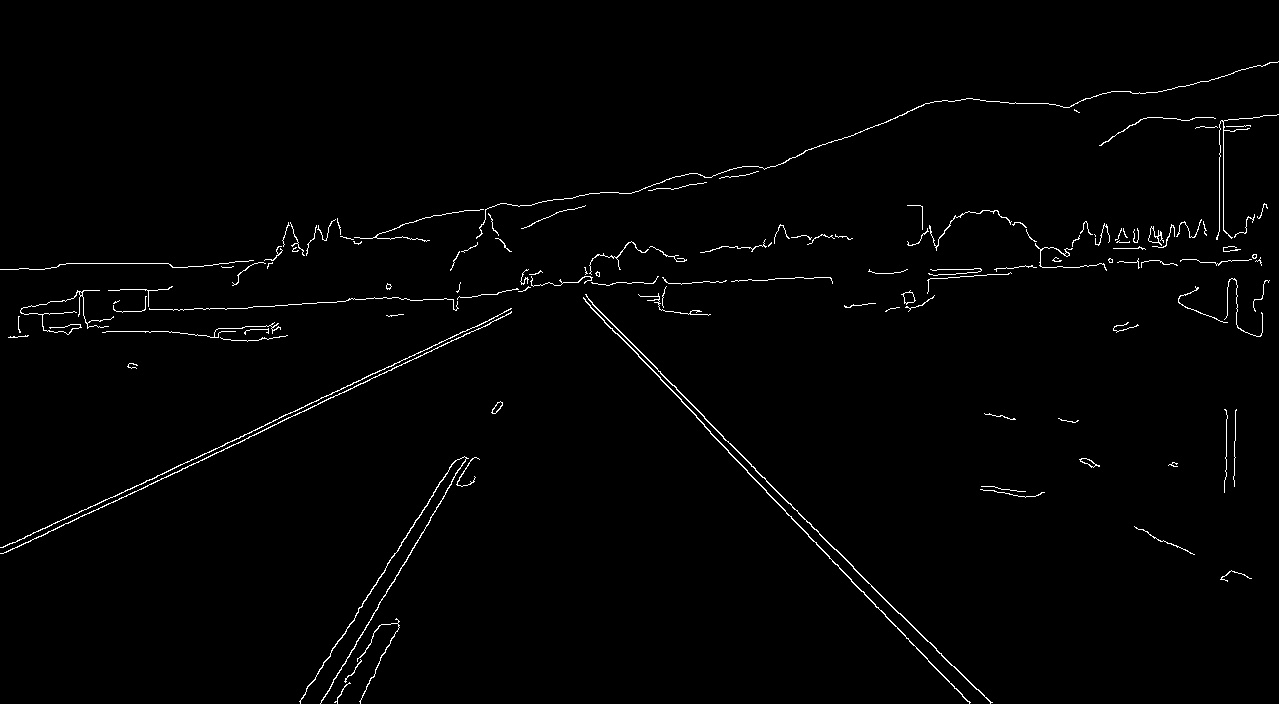

In [13]:
from IPython.display import display, Image

# to save the detected image
cv2.imwrite('canny1.jpg', canny_img)

# display our saved imgs
display(Image(filename='canny1.jpg'))

###  Region of interest masking

In [14]:
# set the polygons of the ROI algorithm
height_img_copy = img_copy.shape[0]
#polygons = np.array([[(0, height_img_copy-16),(300, 250), (450, 300), (700, height_img_copy)]]) # definition of the ROI's shape
polygons = np.array([[(200, height_img_copy), (1100, height_img_copy), (551, 250)]])

In [15]:
# apply ROI algo
roi_masking_img = roi_masking(canny_img, polygons)

"cv2.imshow('Canny Edge detection and ROI applied on input image', roi_masking_img)\ncv2.waitKey()\ncv2.destroyAllWindows()"

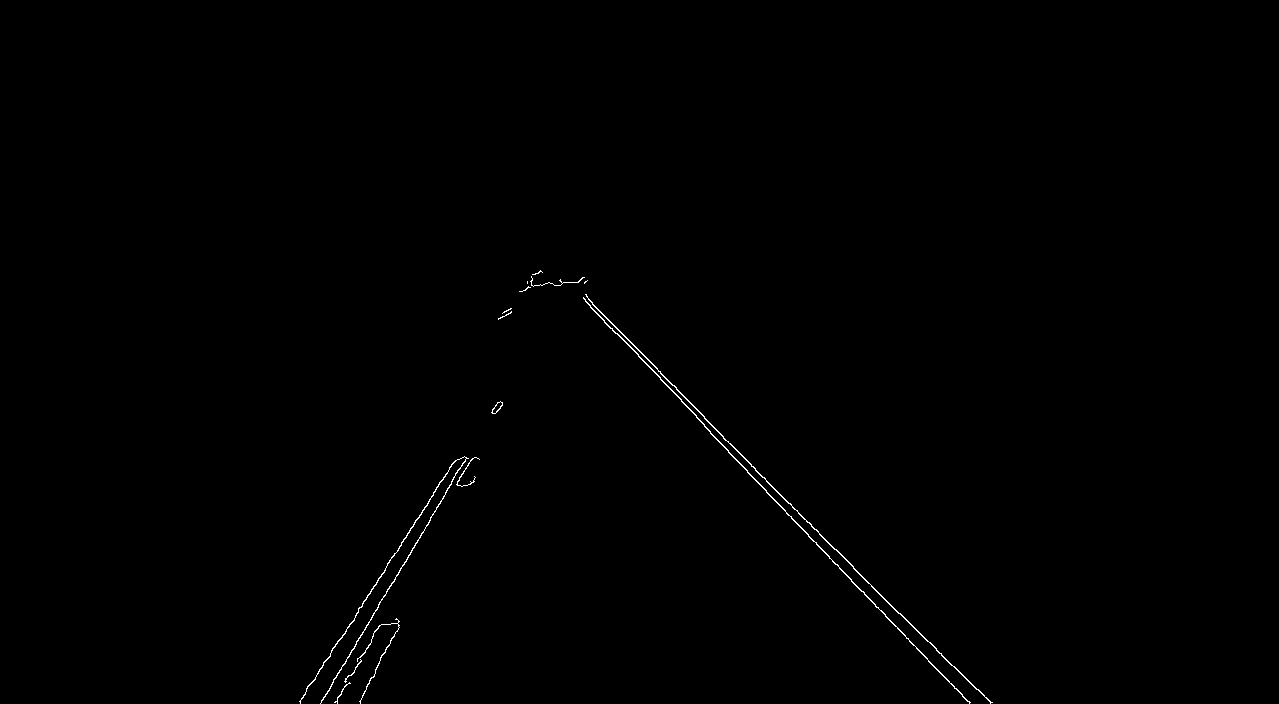

In [16]:
from IPython.display import display, Image

# to save the detected image
cv2.imwrite('roi1.jpg', roi_masking_img)

# display our saved imgs
display(Image(filename='roi1.jpg'))

### Hough transform

In [6]:
# apply hough transform to the input image
hough_img = cv2.HoughLinesP(roi_masking_img, 2, np.pi/180, 20, np.array([]), minLineLength=25, maxLineGap=5)
img_with_lines = show_lines(img_copy, hough_img)

In [17]:
# display the result in the original image
combine_image = cv2.addWeighted(img_copy, 0.8, img_with_lines, 1, 1)

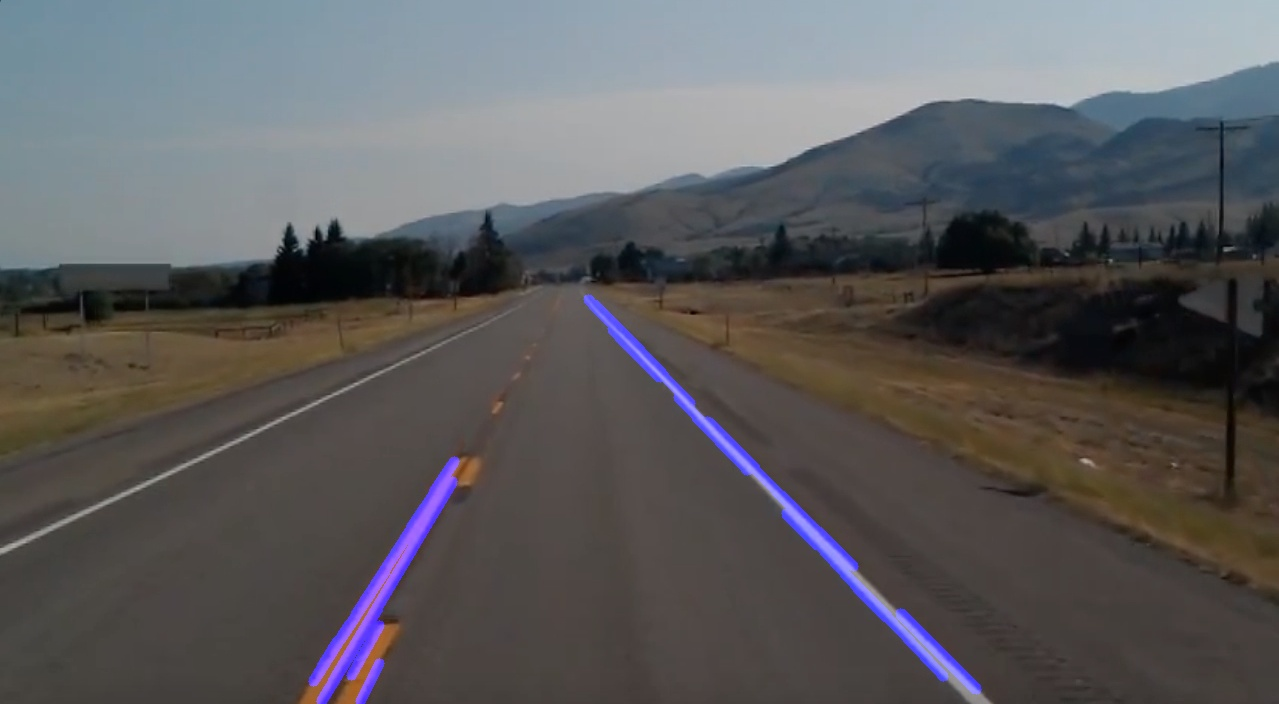

In [18]:
from IPython.display import display, Image

# to save the detected image
cv2.imwrite('res.jpg', combine_image)

# display our saved imgs
display(Image(filename='res.jpg'))

### Improving the previous algorithm by using averaging slope intercept

We know that the important thing is : **the lines currently displayed by our previous algorithm correspond to the section that exceeded the voting threshold**. They were **VOTED** as the lines that best described the data and then we have multiple lines detected at the same position or close to that position. 

That's why we'll need to average out their *slopes* and *y-intercepts* to merge them into **a single line** that could be able to trace all of the lanes detected at the same position. We'll do this by creating two new functions and add these functions to our existed-algorithm.

#### Image testing

In [19]:
# averaging the lines
averaged_lines = average_slope_intercept(img_copy, hough_img)

# show the averaged lines
img_with_average_lines = show_lines(img_copy, averaged_lines)

# combine the image and display
combine_image = cv2.addWeighted(img_copy, 0.8, img_with_average_lines, 1, 1)
cv2.imshow('result', combine_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

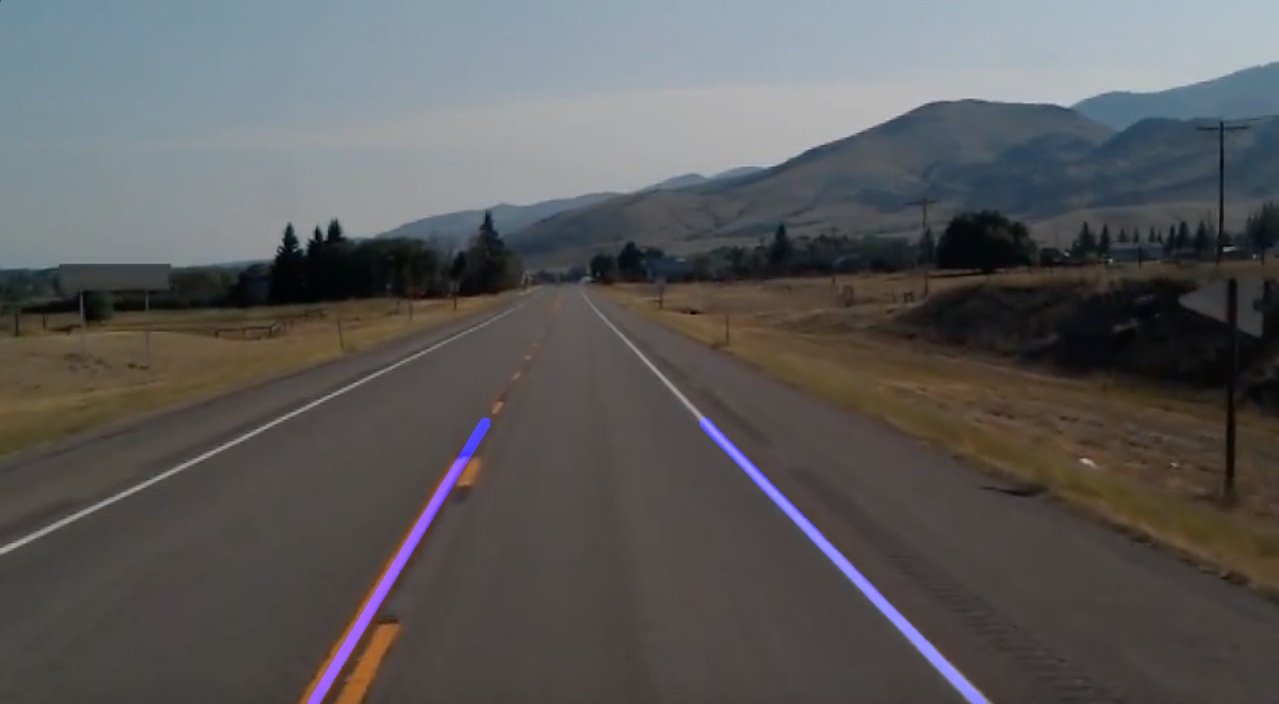

In [20]:
from IPython.display import display, Image

# to save the detected image
cv2.imwrite('res2.jpg', combine_image)

# display our saved imgs
display(Image(filename='res2.jpg'))